In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [14]:
data_types = {'Recall Notification Date': str}
df = pd.read_csv("database.csv", dtype=data_types)
df = df.dropna(subset=['Model Year', 'Recall Notification Date'])
df = df[df['Model Year'] != 9999]

In [3]:
df.dtypes

Record ID                     int64
NHTSA Campaign               object
Manufacturer Campaign        object
Vehicle Make                 object
Vehicle Model                object
Model Year                    int64
Vehicle Manufacturer         object
Recall Type                  object
Recall Component             object
Manufacture Start Date      float64
Manufacture End Date        float64
Estimated Units             float64
Recall Initiative            object
Recall Manufacturer          object
Recall Notification Date     object
dtype: object

In [7]:
xs = []
ys = []
for index, row in df.iterrows():
    xs.append(row['Model Year'])
    year_difference = int(row['Recall Notification Date'][:4]) - row['Model Year']
    y = year_difference * 12 + int(row['Recall Notification Date'][4:6])
    ys.append(y)

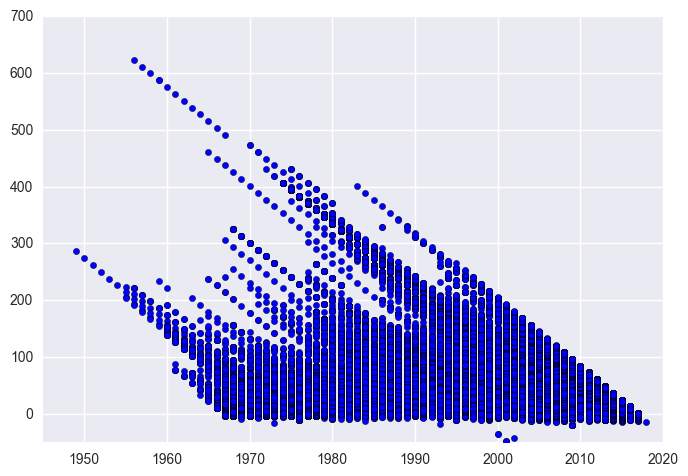

In [11]:
plt.scatter(xs, ys)
plt.ylim((-50,700))
plt.xlim((1945, 2020))
plt.show()

In [13]:
len(xs)

105593

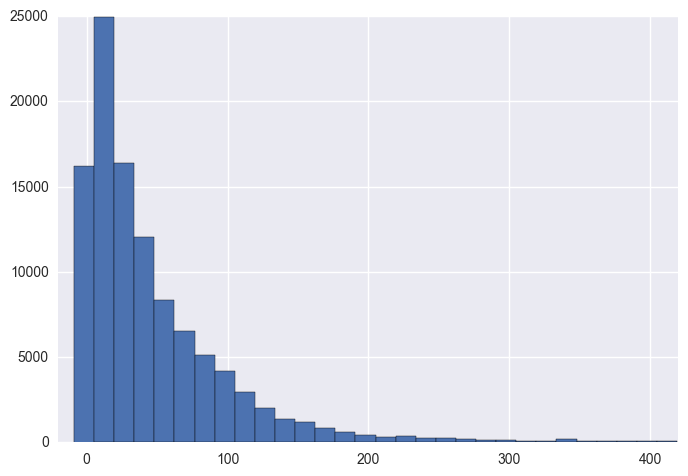

In [57]:
lags = []
for row in df.itertuples():
    lags.append((int(row[-1][:4]) - int(row[6])) * 12 + int(row[-1][4:6]))

plt.hist([x for x in lags if x > -10 and x < 420], bins=30)
plt.xlim((-20, 420))
plt.show()